In [125]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Bring in previously-pulled reports for Material Handlers, Assemblers, Warehouse job listings for TN and TX

Concat vertically into one dataframe

In [126]:
mat_hand_tn = pd.read_json('data/material_handler_tn.json')
#mat_hand_tn

In [127]:
assembler_tn = pd.read_json('data/assembler_tn.json')
#assembler_tn.data[0]

In [128]:
warehouse_tn1 = pd.read_json('data/warehouse_tn.json')
#warehouse_tn1.info()

In [129]:
warehouse_tn1

,recordsFiltered,recordsTotal,data,draw,success,elapsedSeconds,results
0,7237,7237,"{'keyword': 'Warehouse', 'zipcity': None, 'job...",0,True,35.818,success
1,7237,7237,"{'keyword': 'Warehouse', 'zipcity': None, 'job...",0,True,35.818,success
2,7237,7237,"{'keyword': 'Warehouse', 'zipcity': None, 'job...",0,True,35.818,success
3,7237,7237,"{'keyword': 'Warehouse', 'zipcity': None, 'job...",0,True,35.818,success
4,7237,7237,"{'keyword': 'Warehouse', 'zipcity': None, 'job...",0,True,35.818,success
...,...,...,...,...,...,...,...
3995,7237,7237,"{'keyword': 'Warehouse', 'zipcity': None, 'job...",0,True,35.818,success
3996,7237,7237,"{'keyword': 'Warehouse', 'zipcity': None, 'job...",0,True,35.818,success
3997,7237,7237,"{'keyword': 'Warehouse', 'zipcity': None, 'job...",0,True,35.818,success
3998,7237,7237,"{'keyword': 'Warehouse', 'zipcity': None, 'job...",0,True,35.818,success


In [130]:
# Removing 2nd TN warehouse report because keeps returning 0 records, and already have 4000
# warehouse_tn2 = pd.read_json('data/warehouse_tn2.json')
# warehouse_tn2.info()

In [131]:
mat_hand_tx = pd.read_json('data/material_handler_tx.json')
#mat_hand_tx

In [132]:
assembler_tx = pd.read_json('data/assembler_tx.json')
#assembler_tx

In [133]:
warehouse_tx1 = pd.read_json('data/warehouse_tx.json')
#warehouse_tx1

In [134]:
#warehouse_tx1.info()

In [135]:
warehouse_tx2 = pd.read_json('data/warehouse_tx2.json')
# warehouse_tx2.data[1]

In [136]:
#warehouse_tx2.info()

In [137]:
first_concat = pd.concat([assembler_tn, assembler_tx], ignore_index=True)
#axis=1

In [138]:
second_concat = pd.concat([mat_hand_tn, mat_hand_tx], ignore_index=True)

In [139]:
third_concat = pd.concat([warehouse_tx1, warehouse_tx2], ignore_index=True)

In [140]:
fourth_concat = pd.concat([warehouse_tn1], ignore_index=True)

#warehouse_tn2

In [141]:
all_df = [first_concat, second_concat, third_concat, fourth_concat]
final_df = pd.concat(all_df, ignore_index=True)

In [142]:
final_df.shape

(18237, 7)

Clean data column and convert specific key:value pairs into columns

In [143]:
type(final_df)

pandas.core.frame.DataFrame

In [144]:
final_df.columns

Index(['recordsFiltered', 'recordsTotal', 'data', 'draw', 'success',
       'elapsedSeconds', 'results'],
      dtype='object')

In [145]:
final_df = final_df.drop(columns=['recordsFiltered', 'recordsTotal','draw', 'success', 'elapsedSeconds', 'results'])

In [146]:
#final_df.data[0]

In [147]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18237 entries, 0 to 18236
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    18237 non-null  object
dtypes: object(1)
memory usage: 142.6+ KB


In [148]:
final_df.shape

(18237, 1)

In [149]:
final_df.dropna(inplace = True) 

In [150]:
final_df.shape

(18237, 1)

In [151]:
job_list = final_df["data"].tolist()

In [152]:
#job_list

In [153]:
type(job_list)

list

In [154]:
category = [d["keyword"] for d in job_list]
city = [d["city"] for d in job_list]
state = [d["state"] for d in job_list]
job_titles = [d["jobtitle"] for d in job_list]
employer = [d.get('employer') for d in job_list]  #use this format if there will be NaNs
snippet = [d["jobdescription_snippet"] for d in job_list]
job_descriptions = [d["jobdescription"] for d in job_list]
education = [d.get('eduexpdesc') for d in job_list]
min_sal = [d.get('minsal') for d in job_list]  
max_sal = [d.get('maxsal') for d in job_list]  



In [155]:
#job_descriptions

In [156]:
#state

In [157]:
#employer

In [158]:
min_sal

[None,
 None,
 '$12.92',
 '$13.00',
 '$9.00',
 None,
 '$10.25',
 '$12.50',
 None,
 None,
 None,
 None,
 None,
 '$11.00',
 '$12.00',
 None,
 None,
 None,
 None,
 '$15.00',
 None,
 '$12.92',
 '$12.50',
 '$12.00',
 None,
 '$12.25',
 None,
 '$12.00',
 None,
 None,
 None,
 '$12.60',
 '$11.00',
 '$15.50',
 None,
 '$12.50',
 '$11.50',
 None,
 '$15.50',
 None,
 '$15.00',
 '$15.00',
 None,
 '$12.50',
 None,
 None,
 None,
 None,
 None,
 '$12.60',
 '$12.60',
 '$12.60',
 '$15.50',
 '$13.00',
 None,
 None,
 '$16.14',
 None,
 '$13.00',
 None,
 '$12.00',
 '$14.08',
 '$9.50',
 None,
 None,
 None,
 '$16.50',
 None,
 None,
 '$11.00',
 None,
 None,
 None,
 None,
 None,
 '$10.00',
 None,
 None,
 '$12.00',
 '$11.50',
 '$11.00',
 None,
 '$12.00',
 '$12.00',
 '$15.00',
 '$10.00',
 None,
 '$14.50',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '$13.00',
 None,
 None,
 None,
 None,
 '$17.00',
 '$15.00',
 '$17.00',
 '$19.50',
 '$12.00',
 

In [159]:
max_sal

[None,
 None,
 '$16.43',
 '$15.00',
 '$14.50',
 None,
 '$13.50',
 '$13.50',
 None,
 None,
 None,
 None,
 None,
 '$12.00',
 '$13.72',
 None,
 None,
 None,
 None,
 '$17.00',
 None,
 '$16.43',
 '$13.00',
 '$12.60',
 None,
 '$13.97',
 None,
 '$12.00',
 None,
 None,
 None,
 '$16.10',
 '$14.03',
 '$15.50',
 None,
 '$15.50',
 '$16.50',
 None,
 '$16.00',
 None,
 '$16.00',
 '$16.00',
 None,
 '$12.50',
 None,
 None,
 None,
 None,
 None,
 '$16.10',
 '$16.10',
 '$16.10',
 '$15.50',
 '$13.00',
 None,
 None,
 '$16.14',
 None,
 '$14.50',
 None,
 '$12.25',
 '$15.79',
 '$9.50',
 None,
 None,
 None,
 '$17.25',
 None,
 None,
 '$12.00',
 None,
 None,
 None,
 None,
 None,
 '$12.01',
 None,
 None,
 '$12.50',
 '$11.50',
 '$11.00',
 None,
 '$13.00',
 '$12.50',
 '$15.00',
 '$10.00',
 None,
 '$14.50',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '$13.00',
 None,
 None,
 None,
 None,
 '$17.00',
 '$15.00',
 '$17.00',
 '$19.50',
 '$13.00',


In [160]:
bluecollar = pd.DataFrame()
bluecollar['category'] = category
bluecollar['state'] = state
bluecollar['title'] = job_titles
bluecollar['employer'] = employer
bluecollar['city'] = city
bluecollar['snippet'] = snippet
bluecollar['full_description'] = job_descriptions
bluecollar['education'] = education
bluecollar['min_pay'] = min_sal
bluecollar['max_pay'] = max_sal

#print(bluecollar)


Remove the brackets with "highlight keyword" and "span", and \\n

In [161]:
bluecollar['title'] = bluecollar['title'].apply(lambda x: re.sub(r'<.*?>','', str(x)))

In [162]:
bluecollar['snippet'] = bluecollar['snippet'].apply(lambda x: re.sub(r'<.*?>','', str(x)))

In [163]:
bluecollar['full_description'] =  bluecollar['full_description'].apply(lambda x: re.sub(r'<.*?>','', str(x)))

In [164]:
bluecollar['title'] =  bluecollar['title'].apply(lambda x: re.sub(r'\\n','', str(x)))

In [165]:
bluecollar['full_description'] =  bluecollar['full_description'].apply(lambda x: re.sub(r'\\n','', str(x)))

In [166]:
bluecollar['snippet'] =  bluecollar['snippet'].apply(lambda x: re.sub(r'\\n','', str(x)))

In [167]:
#bluecollar

In [168]:
bluecollar = bluecollar.drop_duplicates(keep='last')

In [169]:
bluecollar.shape

(15313, 10)

In [170]:
bluecollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15313 entries, 0 to 18236
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          15313 non-null  object
 1   state             15313 non-null  object
 2   title             15313 non-null  object
 3   employer          15277 non-null  object
 4   city              15313 non-null  object
 5   snippet           15313 non-null  object
 6   full_description  15313 non-null  object
 7   education         15313 non-null  object
 8   min_pay           3639 non-null   object
 9   max_pay           3614 non-null   object
dtypes: object(10)
memory usage: 1.3+ MB


In [171]:
bluecollar_csv = bluecollar.to_csv('data/full_bc_jobs.csv')

Now, identify keywords that could imply criticality of finding talent, search the job snippet and job description fields, and count the number of times the keywords appear

Run the keywords against "full job description".  Note that the keywords were also run against the "job snippet" column
but the total counts were less than the full job description counts, so the snippet column was removed.

In [172]:
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daily\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daily\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


For 'no experience necessary', do I need to add ngram_range = (1,3) (or something like that)?  <br>
how do I remove "no" from the stopwords? 

Sample code below: <br>
stop_words = set(stopwords.words('french'))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['cette', 'les', 'cet']
new_stopwords_list = stop_words.union(new_stopwords)

#remove words that are in NLTK stopwords list
not_stopwords = {'n', 'pas', 'ne'} 
final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])


And then run the words against the "full_description"

In [173]:
# def preprocess_text(full_description):
#     full_description = full_description.lower() # To lower
#     translator = str.maketrans('', '', string.punctuation)
#     full_description = full_description.translate(translator) # Removing punctuation
#     filtered_words = [w for w in full_description.split() if w not in stopwords.words('english')] # Removing stopwords from the tokenized text
#     return ' '.join(filtered_words) # We return the resulting list as a string

#trying to include 'no experience necessary by removing "no" from stopwords'

def preprocess_text(full_description):
    full_description = full_description.lower() 
    translator = str.maketrans('', '', string.punctuation)
    full_description = full_description.translate(translator)
    stop_words = set(stopwords.words('english'))
    not_stopwords = {'no'}
    final_stopwords = set([word for word in stop_words if word not in not_stopwords])
    filtered_words = [w for w in full_description.split() if w not in final_stopwords] 
    return ' '.join(filtered_words) 


In [174]:
KEYWORDS = ['bonus', 'bonuses','pay increase', 'pay increases', 'immediately', 'incentive', 'incentives','no experience necessary']

def count_keywords(full_description):
    counts = {}
    prep = preprocess_text(full_description)
    for kw in KEYWORDS:
        counts[kw] = prep.count(kw)
    return counts



In [175]:
bluecollar['occur_full_desc'] = bluecollar['full_description'].apply(count_keywords)

In [176]:
bluecollar.shape

(15313, 11)

In [177]:
full_desc_incent = bluecollar.occur_full_desc.tolist()

In [178]:
pd.DataFrame(full_desc_incent)

,bonus,bonuses,pay increase,pay increases,immediately,incentive,incentives,no experience necessary
0,0,0,0,0,2,0,0,0
1,0,0,0,0,2,0,0,0
2,1,1,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
15308,1,0,0,0,0,0,0,0
15309,1,0,0,0,0,0,0,0
15310,1,0,0,0,0,0,0,0
15311,1,0,0,0,0,0,0,0


In [179]:
type(bluecollar)

pandas.core.frame.DataFrame

In [180]:
bluecollar

,category,state,title,employer,city,snippet,full_description,education,min_pay,max_pay,occur_full_desc
0,Assembler,TN,Assembler,"Accurate Personnel, LLC",Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,"Job Description Hello First Name, We are excit...",No Minimum Education Requirement,None,None,"{'bonus': 0, 'bonuses': 0, 'pay increase': 0, ..."
1,Assembler,TN,Assembler,"Accurate Personnel, LLC",Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,Job Description HIRING IMMEDIATELY: ASSEMBLER ...,No Minimum Education Requirement,None,None,"{'bonus': 0, 'bonuses': 0, 'pay increase': 0, ..."
3,Assembler,TN,Assembler and Fabricator,FOOD WARMING EQUIPMENT COMPANYINC,PORTLAND,... Assembler/Fabricators will be trained to:...,PRODUCTION – ENTRY LEVEL – NO EXPERIENCE NECES...,No Minimum Education Requirement,$13.00,$15.00,"{'bonus': 1, 'bonuses': 1, 'pay increase': 0, ..."
4,Assembler,TN,Manufacturing Assembler,WISE STAFFING GROUP,Cookeville,General warehouse assembly line. We have avail...,General warehouse assembly line. We have avail...,No Minimum Education Requirement,$9.00,$14.50,"{'bonus': 0, 'bonuses': 0, 'pay increase': 0, ..."
5,Assembler,TN,General Plant Assembler - Full-Time,"Nortek Global HVAC, LLC",Dyersburg,... Assembler – Full-time & Seasonal Location...,Position Title: General Plant Assembler – Ful...,High School Diploma or Equivalent,None,None,"{'bonus': 0, 'bonuses': 0, 'pay increase': 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
18232,Warehouse,TN,Inventory Associate - 0406,WIS International,Oak Ridge,... warehouse physically counting merchandise...,We are pleased to announce a $200 Sign-on Bonu...,No Minimum Education Requirement,None,None,"{'bonus': 1, 'bonuses': 0, 'pay increase': 0, ..."
18233,Warehouse,TN,Inventory Associate - 0406,WIS International,Maryville,... warehouse physically counting merchandise...,We are pleased to announce a $200 Sign-on Bonu...,No Minimum Education Requirement,None,None,"{'bonus': 1, 'bonuses': 0, 'pay increase': 0, ..."
18234,Warehouse,TN,Inventory Associate - 0406,WIS International,Jonesborough,... warehouse physically counting merchandise...,We are pleased to announce a $200 Sign-on Bonu...,No Minimum Education Requirement,None,None,"{'bonus': 1, 'bonuses': 0, 'pay increase': 0, ..."
18235,Warehouse,TN,Inventory Associate - 0406,WIS International,Kingsport,... warehouse physically counting merchandise...,We are pleased to announce a $200 Sign-on Bonu...,No Minimum Education Requirement,None,None,"{'bonus': 1, 'bonuses': 0, 'pay increase': 0, ..."


In [181]:
bluecollar3 = pd.concat([bluecollar.reset_index(), pd.DataFrame(full_desc_incent).reset_index()], axis=1)

In [182]:
bluecollar3.shape

(15313, 21)

In [183]:
bluecollar3.head(2)

,index,category,state,title,employer,city,snippet,full_description,education,min_pay,max_pay,occur_full_desc,index,bonus,bonuses,pay increase,pay increases,immediately,incentive,incentives,no experience necessary
0,0,Assembler,TN,Assembler,"Accurate Personnel, LLC",Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,"Job Description Hello First Name, We are excit...",No Minimum Education Requirement,None,None,"{'bonus': 0, 'bonuses': 0, 'pay increase': 0, ...",0,0,0,0,0,2,0,0,0
1,1,Assembler,TN,Assembler,"Accurate Personnel, LLC",Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,Job Description HIRING IMMEDIATELY: ASSEMBLER ...,No Minimum Education Requirement,None,None,"{'bonus': 0, 'bonuses': 0, 'pay increase': 0, ...",1,0,0,0,0,2,0,0,0


In [184]:
bluecollar3.describe()

,index,index,bonus,bonuses,pay increase,pay increases,immediately,incentive,incentives,no experience necessary
count,15313.00000,15313.000000,15313.000000,15313.000000,15313.000000,15313.000000,15313.000000,15313.000000,15313.000000,15313.000000
mean,9339.21374,7656.000000,0.172664,0.048978,0.009534,0.004245,0.065173,0.043231,0.020179,0.006008
std,5230.59899,4420.626671,0.608815,0.256736,0.106786,0.071703,0.277245,0.218254,0.140617,0.086831
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4964.00000,3828.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9277.00000,7656.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13989.00000,11484.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18236.00000,15312.000000,12.000000,12.000000,3.000000,3.000000,5.000000,4.000000,1.000000,2.000000


In [185]:
bluecollar3['bonus_ttl'] = bluecollar3['bonus'] + bluecollar3['bonuses']
#bluecollar3

In [186]:
bluecollar3['incentive_ttl'] = bluecollar3['incentive'] + bluecollar3['incentives']
#bluecollar3

In [187]:
bluecollar3['increase_ttl'] = bluecollar3['pay increase'] + bluecollar3['pay increases']
#bluecollar3

In [188]:
bluecollar3 = bluecollar3.drop(columns = ['occur_full_desc', 'bonus', 'bonuses', 'incentive', 'incentives', 'pay increase', 'pay increases'])

In [189]:
bluecollar3 = bluecollar3.rename(columns = {'bonus_ttl': 'bonus', 'incentive_ttl':'incentive', 'increase_ttl':'pay increase'})

In [190]:
bluecollar3['total keywords'] = bluecollar3['incentive'] + bluecollar3['pay increase'] + bluecollar3['no experience necessary'] + bluecollar3['immediately'] + bluecollar3['bonus']
bluecollar3.head(2)

,index,category,state,title,employer,city,snippet,full_description,education,min_pay,max_pay,index,immediately,no experience necessary,bonus,incentive,pay increase,total keywords
0,0,Assembler,TN,Assembler,"Accurate Personnel, LLC",Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,"Job Description Hello First Name, We are excit...",No Minimum Education Requirement,None,None,0,2,0,0,0,0,2
1,1,Assembler,TN,Assembler,"Accurate Personnel, LLC",Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,Job Description HIRING IMMEDIATELY: ASSEMBLER ...,No Minimum Education Requirement,None,None,1,2,0,0,0,0,2


In [191]:
bluecollar3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15313 entries, 0 to 15312
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    15313 non-null  int64 
 1   category                 15313 non-null  object
 2   state                    15313 non-null  object
 3   title                    15313 non-null  object
 4   employer                 15277 non-null  object
 5   city                     15313 non-null  object
 6   snippet                  15313 non-null  object
 7   full_description         15313 non-null  object
 8   education                15313 non-null  object
 9   min_pay                  3639 non-null   object
 10  max_pay                  3614 non-null   object
 11  index                    15313 non-null  int64 
 12  immediately              15313 non-null  int64 
 13  no experience necessary  15313 non-null  int64 
 14  bonus                    15313 non-nul

In [192]:
bluecollar3['total keywords'].sum()

5666

In [193]:
#create column and assigns a "1" if there is a number that is >= 1 in the total keywords column
bluecollar3['occur'] = bluecollar3['total keywords'].apply(lambda x: "1" if x >= 1 else "0")

In [194]:
bluecollar3['occur'].value_counts()

0    12418
1     2895
Name: occur, dtype: int64

19% of the Blue Collar job postings contained at least 1 keyword.  However, a similar exercise using Marketing job postings yielded 12% of Marketing job postings contained at least 1 keyword. 

In [195]:
import plotly.graph_objects as go

field =['Bluecollar', 'Help Desk Technician']

fig = go.Figure(data=[
    go.Bar(name='occurence', x=field, y=[19,6], 
           #text=y,
           #textposition='auto',  #this produced '14' for Marketing          
          ),
    go.Bar(name='no occurence', x=field, y=[81,94])
])
# Change the bar mode
fig.update_layout(barmode='stack', title = "Percent of Job Descriptions with Keywords", 
       xaxis_title = 'Job Discipline', yaxis_title =  
       'Percentage', width = 400, height = 400)
fig.show()

fig.write_html('../Capstone_US_Blue_Collar_workers/data/percent_of_postings_by_job.html')

Understand the extent of "no minimum education" requirements 

In [196]:
bluecollar3.education.unique()

array(['No Minimum Education Requirement',
       'High School Diploma or Equivalent', 'High School Diploma',
       "Bachelor's Degree", "Associate's Degree",
       'High School Equivalency Diploma',
       '1 Year at College or a Technical or Vocational School',
       '2 Years at College or a Technical or Vocational School',
       '12th Grade Completed & Did not receive diploma or equivalent',
       "Master's Degree", 'Doctorate Degree',
       '2 Years of College or a Technical or Vocational School',
       'Vocational School Certificate'], dtype=object)

In [197]:
bluecollar3['employer'] = bluecollar3['employer'].replace("Not Available", 'Recruiter, Other 3rd Party')

In [198]:
bluecollar3['employer'].unique()

array(['Accurate Personnel, LLC', 'FOOD WARMING EQUIPMENT COMPANYINC',
       'WISE STAFFING GROUP', ..., 'JE Dunn Construction',
       'HarperCollins Publishers, Inc.', 'C.H. Robinson Worldwide, Inc'],
      dtype=object)

In [199]:
keyword_compare = bluecollar3.drop(columns = ['title', 'employer', 'full_description', 'education', 'min_pay', 'max_pay'])
keyword_compare.head(3)

,index,category,state,city,snippet,index,immediately,no experience necessary,bonus,incentive,pay increase,total keywords,occur
0,0,Assembler,TN,Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,0,2,0,0,0,0,2,1
1,1,Assembler,TN,Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,1,2,0,0,0,0,2,1
2,3,Assembler,TN,PORTLAND,... Assembler/Fabricators will be trained to:...,2,0,2,2,0,0,4,1


In [200]:
keyword_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15313 entries, 0 to 15312
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    15313 non-null  int64 
 1   category                 15313 non-null  object
 2   state                    15313 non-null  object
 3   city                     15313 non-null  object
 4   snippet                  15313 non-null  object
 5   index                    15313 non-null  int64 
 6   immediately              15313 non-null  int64 
 7   no experience necessary  15313 non-null  int64 
 8   bonus                    15313 non-null  int64 
 9   incentive                15313 non-null  int64 
 10  pay increase             15313 non-null  int64 
 11  total keywords           15313 non-null  int64 
 12  occur                    15313 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.5+ MB


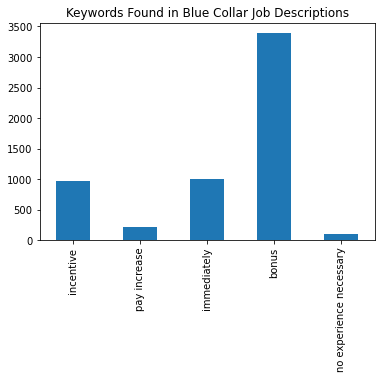

In [201]:
keyword_compare[['incentive', 'pay increase', 'immediately', 'bonus', 'no experience necessary']].sum().plot(kind='bar',
                                                                                                             title='Keywords Found in Blue Collar Job Descriptions')
plt.show()

#, 'total keywords'

In [202]:
# fig = px.bar(keyword_compare, x = ['incentive', 'pay increase', 'immediately', 'bonus', 'no experience necessary'],
#              y = 'total keywords',
#              #hover_data = ['overdoses'], 
#              labels=dict(x="Keyword", y="Number of Occurences"))
# fig.update_layout(title = 'Keyword Occurences in Blue Collar Job Postings')
# fig.show()



# fig.write_html('../Capstone_US_Blue_Collar_workers/data/bc_keyword_occurs.html')



In [203]:
keyword_compare = bluecollar3.drop(columns = ['title', 'employer', 'full_description', 'min_pay', 'max_pay'])
keyword_compare.head(3)

,index,category,state,city,snippet,education,index,immediately,no experience necessary,bonus,incentive,pay increase,total keywords,occur
0,0,Assembler,TN,Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,No Minimum Education Requirement,0,2,0,0,0,0,2,1
1,1,Assembler,TN,Knoxville,... ASSEMBLER - EARN $14/HOUR We are hiring i...,No Minimum Education Requirement,1,2,0,0,0,0,2,1
2,3,Assembler,TN,PORTLAND,... Assembler/Fabricators will be trained to:...,No Minimum Education Requirement,2,0,2,2,0,0,4,1


In [204]:
keyword_compare['total keywords'].sum()

5666

In [205]:
bc_percent = bluecollar3['total keywords'].sum() / bluecollar3['snippet'].count()*100
bc_percent
# fig = px.pie((, values='total keywords', names='state', title='Population of European continent')
# fig.show()

37.001240775811404

Try this website for better facetgrids <br>
https://seaborn.pydata.org/tutorial/axis_grids.html
https://www.geeksforgeeks.org/python-seaborn-facetgrid-method/

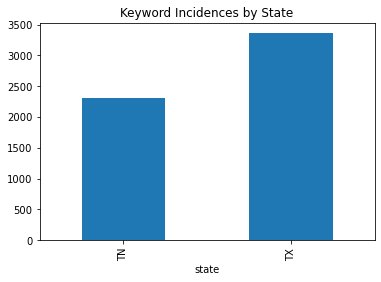

In [206]:
bluecollar3.groupby('state')['total keywords'].sum().plot(kind = 'bar', title = 'Keyword Incidences by State')
plt.show()

In [207]:
employer_compare = bluecollar3.groupby('employer')['total keywords'].sum().sort_values(ascending=False).head(15)
employer_compare

employer
Recruiter, Other 3rd Party         1291
U.S. Army                           408
Amazon Fullfillment                 183
Amazon.com, Inc.                    181
AMAZON.COM                          161
Capstone Logistics, LLC.            136
ManpowerGroup                       129
FedEx                                99
Petroleum Service Corporation        81
McKesson Corporation                 68
Staffmark Investment LLC             66
AVERITT EXPRESS INC                  60
Staff Management Solutions, LLC      57
PDS Tech, Inc.                       56
Abbott Laboratories                  54
Name: total keywords, dtype: int64

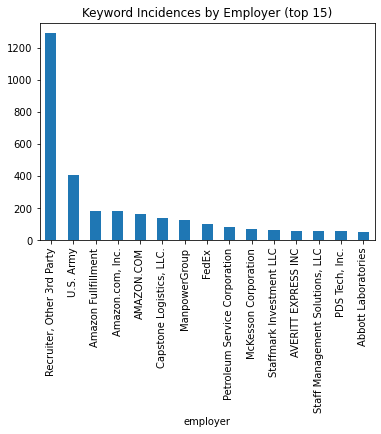

In [208]:
employer_compare.plot(kind='bar', title = 'Keyword Incidences by Employer (top 15)')
plt.show()

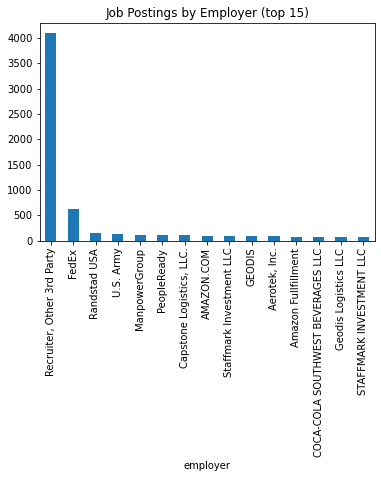

In [209]:
bluecollar3.groupby('employer')['employer'].count().sort_values(ascending=False).head(15).plot(kind='bar', title='Job Postings by Employer (top 15)')

In [210]:
#bluecollar3[bluecollar3.employer.isin(['Amazon Fulfillment', 'AMAZON.COM', 'Amazon.com, Inc.'])]
#this produced 145 rows

Tackle the wages for blue collar workers and compare against MIT living wage 

In [211]:
wages = bluecollar3[['category', 'state', 'city', 'title', 'min_pay', 'max_pay']]

In [212]:
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15313 entries, 0 to 15312
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  15313 non-null  object
 1   state     15313 non-null  object
 2   city      15313 non-null  object
 3   title     15313 non-null  object
 4   min_pay   3639 non-null   object
 5   max_pay   3614 non-null   object
dtypes: object(6)
memory usage: 717.9+ KB


In [213]:
wages['min_pay'] = wages['min_pay'].str.replace(r"[\''\,$]", '').dropna()
#.astype(int)   #.dropna() #test['Address 1'] = test['Address 1'].str.replace(r"[\"\',]", '')

<ipython-input-213-59b58ae42b30>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
wages = wages.dropna()

In [215]:
wages.shape

(3613, 6)

In [216]:
#wages.min_pay.unique()

In [217]:
#wages.max_pay.unique()

In [218]:
wages['max_pay'] = wages['max_pay'].str.replace(r"[\''\,$]", '')

In [219]:
wages['max_pay'].unique()

array(['15.00', '14.50', '13.50', '12.00', '13.72', '17.00', '16.43',
       '13.00', '12.60', '13.97', '16.10', '14.03', '15.50', '16.50',
       '16.00', '12.50', '16.14', '12.25', '15.79', '9.50', '17.25',
       '12.01', '11.50', '11.00', '10.00', '19.50', '11.05', '14.00',
       '17.05', '18.50', '17', '10.25', '13.25', '12.30', '14.85',
       '12.46', '14.60', '22.18', '13.87', '13.20', '10.50', '14.20',
       '17.75', '18.42', '21.41', '9.00', '15.65', '8.50', '12.53',
       '15.40', '16.40', '14.75', '15.25', '15.63', '66560', '16.75',
       '26000', '671.20', '15.55', '17000', '12.95', '15.16', '15000',
       '18.10', '22.50', '15.47', '27.75', '22.00', '22.20', '14.80',
       '20.00', '18.00', '14.35', '19.00', '14.90', '13.34', '14.25',
       '41000', '18.55', '13.75', '13.35', '17.50', '100.00', '23.00',
       '17.42', '13.70', '11.25', '12.75', '11.95', '897.00', '25.00',
       '10.40', '35.00', '10.65', '12.04', '11.56', '60000', '27.00',
       '55.00', '41600'

In [220]:
wages['min_pay'] = pd.to_numeric(wages['min_pay'])

In [221]:
wages = wages.sort_values(by = 'min_pay')

In [222]:
wages

,category,state,city,title,min_pay,max_pay
10829,Warehouse,TX,Plano,Warehouse Clerk,2.00,2.00
11887,Warehouse,TN,Memphis,BCB Production Warehouse Associates - 2nd Shif...,4.42,4.42
5125,Material Handler,TX,ABILENE,Delivery Person,4.73,4.73
8583,Warehouse,TX,ABILENE,Delivery Person,4.73,4.73
14233,Warehouse,TN,CHATTANOOGA,Production Operator,5.43,12.00
...,...,...,...,...,...,...
13829,Warehouse,TN,Nashville,Enterprise Software Sales Executive - Warehous...,120000.00,300000
13828,Warehouse,TN,Brentwood,Sales Executive - Engineered Warehouse Automat...,120000.00,300000
2169,Assembler,TX,Richardson,Mainframe z/OS System Engineer -Full time,120000.00,140000
13722,Warehouse,TN,Chattanooga,Sales - Warehouse Automation Services - Chatta...,150000.00,300000


In [223]:
wages[wages['min_pay'] >= 60000]

,category,state,city,title,min_pay,max_pay
11677,Warehouse,TX,Austin,Warehouse Teammate- Shipping and Receiving,60000.0,60000
11665,Warehouse,TX,Dallas,Senior Warehouse Operations Manager - Contract...,60000.0,70000
11579,Warehouse,TX,Austin,Warehouse Teammate- Shipping and Receiving,60000.0,65000
13838,Warehouse,TN,Murfreesboro,Account Manager - Warehouse Systems Solutions ...,70000.0,300000
13839,Warehouse,TN,Clarksville,Territory Sales Manager - Turnkey Warehouse Sy...,70000.0,300000
14966,Warehouse,TN,Memphis,"Pulp & Paper, Converting, Chemical, Recycling ...",75000.0,160000
13944,Warehouse,TN,Knoxville,Field Service & Installation Technician - Ware...,80000.0,120000
14538,Warehouse,TN,Franklin,Technical Product Owner - 006VH3,89060.0,157943
2174,Assembler,TX,Richardson,Mainframe Z/OS Systems Engineer,100000.0,140000
13772,Warehouse,TN,Memphis,Warehouse Manager – Growing Stable Company,110000.0,110000


In [224]:
wages = wages[wages['min_pay']<=60000]

In [225]:
wages.shape

(3599, 6)

In [226]:
wages.tail(200)

,category,state,city,title,min_pay,max_pay
4094,Material Handler,TN,Mount Juliet,"Laborer - Mt. Juliet, TN",21.00,21.00
11018,Warehouse,TX,Lubbock,WAREHOUSE MAINTENANCE III,21.00,21.00
13041,Warehouse,TN,Memphis,Warehouse Forklift Operators,21.00,21.00
13131,Warehouse,TN,Memphis,Warehouse Forklift Operators,21.50,21.50
13423,Warehouse,TN,Memphis,Warehouse Forklift Operator,21.50,21.50
2577,Assembler,TX,Coppell,Production Operator,22.00,24.00
9496,Warehouse,TX,Houston,Warehouse Lead,22.00,22.00
6505,Material Handler,TX,Richardson,Material Handler 2nd Shift (TXOPC_175),22.00,22.00
1861,Assembler,TX,Richardson,Manufacturing Assembler II Batch Seal A Shift ...,22.00,22.00
9504,Warehouse,TX,Houston,Online Classified: Warehouse Workers Needed,22.00,25.00


In [227]:
wages_output = wages.to_csv('data/wages_output.csv')

In [228]:
wages_standardized = pd.read_csv('data/wages_output_standardized.csv', index_col=0)
wages_standardized.head(3)

,category,state,city,title,min_pay_stdzd,max_pay_stdzd
1394.0,Assembler,TX,Schertz,Assembly Technician - Selma - $1250 Bonus,7.25,18.0
9874.0,Warehouse,TX,SULPHUR SPRINGS,Warehouse Laborer - Sulphur Springs,7.25,10.0
6224.0,Material Handler,TX,MCALLEN,General Laborer,7.25,10.0


In [229]:
wages_standardized = wages_standardized.dropna()

In [230]:
wages_standardized['ave_pay'] = ((wages_standardized['min_pay_stdzd'] + wages_standardized['max_pay_stdzd'])/2)
wages_standardized.head()

,category,state,city,title,min_pay_stdzd,max_pay_stdzd,ave_pay
1394.0,Assembler,TX,Schertz,Assembly Technician - Selma - $1250 Bonus,7.25,18.00,12.625
9874.0,Warehouse,TX,SULPHUR SPRINGS,Warehouse Laborer - Sulphur Springs,7.25,10.00,8.625
6224.0,Material Handler,TX,MCALLEN,General Laborer,7.25,10.00,8.625
6401.0,Material Handler,TX,Mcallen,General Laborers (McAllen Area),7.25,7.25,7.250
6816.0,Material Handler,TX,El Paso,Warehouse Associate,7.25,7.25,7.250


In [231]:
#wages_standardized.ave_pay.unique() 

In [232]:
fig1 = px.histogram(wages_standardized, x = 'ave_pay', color = 'state', marginal = 'violin',
                   hover_data = wages_standardized.columns, title='Blue Collar Wage Distribution by State')


fig2 = px.histogram(wages_standardized, x='ave_pay', facet_col="state", facet_col_wrap=2, color='state',
                    nbins=350,
                  #category_orders = {"state":['TN', 'TX']},
                   height=450,
                   title='Blue Collar Wage Distribution by State with MIT Living Wage Index'
                  )

fig2.add_shape(
    dict(type="line", x0=26.30, x1=27.00, y0=0, y1=250, line_color="yellow"
        ), row="all", col=1
)

fig2.add_shape(
    dict(type="line", x0=28.68, x1=29.00, y0=0, y1=250, line_color="yellow"), row="all", col=2
)

fig1.show()
fig2.show()

fig1.write_html('../Capstone_US_Blue_Collar_workers/data/wage distribution by State.html')
fig.write_html('../Capstone_US_Blue_Collar_workers/data/wage distribution with MIT lwi.html')

Living Wage represents 1 Adult/1 Child, TN = 26.30, TX = 28.68   <br>
Living Wage Source: Glasmeier, Amy K. Living Wage Calculator. 2020. Massachusetts Institute of Technology. livingwage.mit.edu. 

In [233]:
#potential app, https://plotly.com/python/horizontal-vertical-shapes/ 
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px

# df = px.data.iris()

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     dcc.Graph(id="graph"),
#     html.P("Position of hline"),
#     dcc.Slider(
#         id='slider-position', 
#         min=1, max=7, value=2.5, step=0.1,
#         marks={1: '1', 7: '7'}
#     )
# ])

# @app.callback(
#     Output("graph", "figure"), 
#     [Input("slider-position", "value")])
# def display_graph(pos_x):
#     fig = px.scatter(
#         df, x="petal_length", y="petal_width")
#     fig.add_vline(
#         x=pos_x, line_width=3, line_dash="dash", 
#         line_color="green")
#     fig.add_hrect(
#         y0=0.9, y1=2.6, line_width=0, 
#         fillcolor="red", opacity=0.2)

#     return fig

# app.run_server(debug=True)

Do a facet grid showing histogram of wages between TN & TX, and insert line showing MIT living wage for each state <br>
Dash app:   https://dash.plotly.com/layout 

In [234]:
bc_jobs = bluecollar3.to_csv('data/bc_jobs.csv')

In [235]:


# def preprocess_text(job_snippet):
#     job_snippet = job_snippet.lower() # To lower
#     translator = str.maketrans('', '', string.punctuation)
#     job_snippet = job_snippet.translate(translator) # Removing punctuation
#     filtered_words = [w for w in job_snippet.split() if w not in stopwords.words('english')] # Removing stopwords from the tokenized text
#     return ' '.join(filtered_words) # returns the resulting list as a string

In [236]:
# KEYWORDS = ['bonus', 'bonuses', 'incentive', 'pay increase','training','immediately' ]

# def count_keywords(job_snippet):
#     counts = {}
#     prep = preprocess_text(job_snippet)
#     for kw in KEYWORDS:
#         counts[kw] = prep.count(kw)
#     return counts

In [237]:
# sum_incent = bluecollar3.drop(columns = ['title', 'job_snippet', 'location', 'full_description', 'min_pay', 'max_pay',
#                                         'occur_snippet', 'occur_full_desc'])
# sum_incent.sum(axis=0)

In [238]:
#pie chart visual
# labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
# values = [4500, 2500, 1053, 500]

# fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
#                              insidetextorientation='radial'
#                             )])
# fig.show()

In [239]:
# The State wages graph by itself 
# fig2 = px.histogram(wages_standardized, x='ave_pay', facet_col="state", facet_col_wrap=2, color='state',
#                   #category_orders = {"state":['TN', 'TX']},
#                    height=500,
#                    title='Blue Collar Wage Distribution by State with MIT Living Wage Index'
#                   )

# fig2.add_shape(
#     dict(type="line", x0=26.30, x1=27.00, y0=0, y1=250, line_color="yellow"
#         ), row="all", col=1
# )

# fig2.add_shape(
#     dict(type="line", x0=28.68, x1=29.00, y0=0, y1=250, line_color="yellow"), row="all", col=2
# )

# fig2.show()